In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import ray
from ray.rllib.algorithms import ppo
from ray.tune.logger import pretty_print
import trading_env

In [2]:
ray.shutdown()
ray.init()

2024-07-10 21:25:34,930	INFO worker.py:1771 -- Started a local Ray instance.


Python version:,3.12.4
Ray version:,2.31.0


In [3]:
algo = ppo.PPO(env=trading_env.TradingEnv, config={"env_config": {
    "render_mode" : None,
    "memory_length" : 30,
    "episode_length" : 90,
    "step_discount" : trading_env.annual_to_daily_discount(0.98),
}})

results = []

for i in range(10):
    print(f"Training episode batch {i}")
    results.append(algo.train())
    # print(pretty_print(results[-i]))
    if i % 10 == 0:
        checkpoint_dir = algo.save().checkpoint.path
        print(f"Checkpoint after trial {i} saved in directory {checkpoint_dir}")

2024-07-10 21:25:41,090	WARNING deprecation.py:50 -- DeprecationWarning: `algo = Algorithm(env='<class 'trading_env.TradingEnv'>', ...)` has been deprecated. Use `algo = AlgorithmConfig().environment('<class 'trading_env.TradingEnv'>').build()` instead. This will raise an error in the future!
c:\Users\brand\AppData\Local\Programs\Python\Python312\Lib\site-packages\ray\rllib\algorithms\algorithm.py:516: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  return UnifiedLogger(config, logdir, loggers=None)
c:\Users\brand\AppData\Local\Programs\Python\Python312\Lib\site-packages\ray\tune\logger\unified.py:53: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
The `JsonLogger

(pid=40092) WARNING:tensorflow:From c:\Users\brand\AppData\Local\Programs\Python\Python312\Lib\site-packages\ray\rllib\utils\framework.py:126: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.
(pid=40092) 
(pid=40100) 


Training episode batch 0


2024-07-10 21:26:12,966	WARNING deprecation.py:50 -- DeprecationWarning: `ray.rllib.execution.train_ops.multi_gpu_train_one_step` has been deprecated. This will raise an error in the future!


Checkpoint after trial 0 saved in directory C:\Users\brand\AppData\Local\Temp\tmpapt2hu1_
Training episode batch 1


KeyboardInterrupt: 

In [ ]:
checkpoint_dir = algo.save().checkpoint.path
print(pretty_print(results[-1]))
print(f"Checkpoint after trial {i} saved in directory {checkpoint_dir}")

agent_timesteps_total: 40000
counters:
  num_agent_steps_sampled: 40000
  num_agent_steps_trained: 40000
  num_env_steps_sampled: 40000
  num_env_steps_trained: 40000
custom_metrics: {}
date: 2024-07-10_11-26-28
done: false
env_runners:
  connector_metrics:
    ObsPreprocessorConnector_ms: 0.03811144828796387
    StateBufferConnector_ms: 0.003004312515258789
    ViewRequirementAgentConnector_ms: 0.12362265586853027
  custom_metrics: {}
  episode_len_mean: 90.0
  episode_media: {}
  episode_return_max: 144.11399042973738
  episode_return_mean: 74.38181640495092
  episode_return_min: -9.074734820260858
  episode_reward_max: 144.11399042973738
  episode_reward_mean: 74.38181640495092
  episode_reward_min: -9.074734820260858
  episodes_this_iter: 44
  episodes_timesteps_total: 9000
  hist_stats:
    episode_lengths: [90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90,
      90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90,
      90, 90, 90, 90, 90, 90, 90,

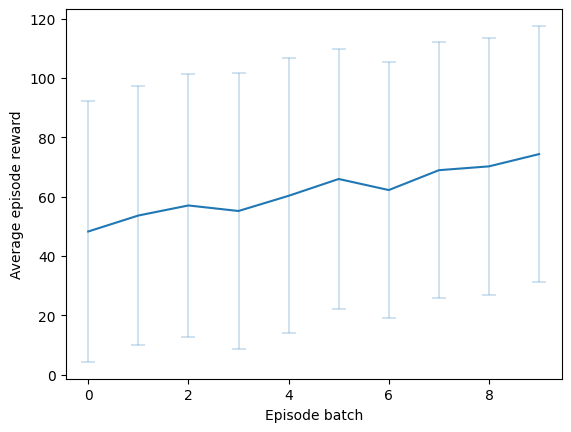

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

reward_mean = [np.mean(results[i]["env_runners"]["hist_stats"]["episode_reward"]) for i in range(len(results))]
reward_stde = [np.std(results[i]["env_runners"]["hist_stats"]["episode_reward"]) for i in range(len(results))]
plt.errorbar(np.arange(len(reward_mean)), reward_mean, reward_stde,
             capsize=5, elinewidth=0.3, capthick=0.3)
plt.xlabel("Episode batch")
plt.ylabel("Average episode reward")
plt.show()